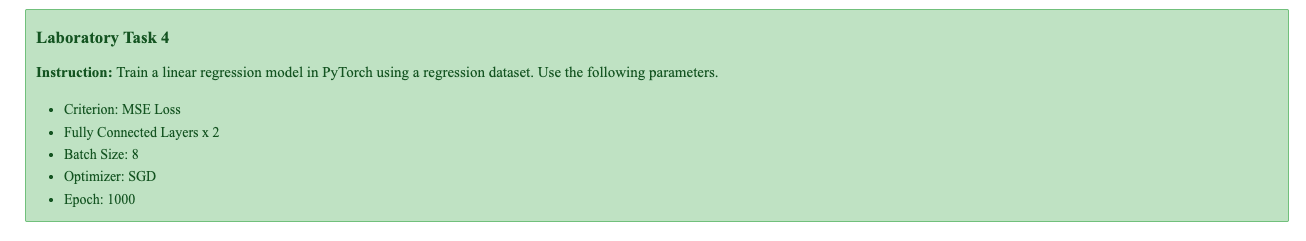

In [3]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

In [5]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
inputs = torch.tensor(X, dtype=torch.float32)
targets = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [7]:
# Create DataLoader
train_ds = TensorDataset(inputs, targets)
train_dl = DataLoader(train_ds, batch_size=8, shuffle=True)

## Define Model

In [9]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

input_dim = inputs.shape[1]
hidden_dim = 32
output_dim = 1
model = LinearRegressionModel(input_dim, hidden_dim, output_dim)

In [10]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Train loop

epochs = 1000
losses = []

for epoch in range(epochs):
    for xb, yb in train_dl:
        # Forward pass
        preds = model(xb)
        loss = loss_fn(preds, yb)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    losses.append(loss.item())
    
    # Print every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

In [ ]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve (California Housing)")
plt.show()

The training loss curve of the California Housing model reveals a highly erratic learning process over 1000 epochs, marked by frequent sharp oscillations and several extreme spikes, with the largest surpassing 2.0 around Epoch 400. Such instability strongly indicates exploding gradients and an excessively high learning rate, which hindered the model from achieving stable convergence. Although the model occasionally reached very low loss values—its best being 0.0972 at Epoch 900—the persistent fluctuations show that it was repeatedly overshooting the optimal solution. By the final epoch, the loss had risen considerably to 0.2740, suggesting overfitting or divergence after Epoch 900, with the state at the minimum loss representing the model’s most effective performance.


In [ ]:
# Model Evaluation
model.eval()
with torch.no_grad():
    predictions = model(inputs).numpy()
    true_values = targets.numpy()

# Compute metrics
mse = mean_squared_error(true_values, predictions)
r2 = r2_score(true_values, predictions)

print(f"\nFinal MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}\n")

In [ ]:
# First 5 predictions vs Actual
for i in range(5):
    print(f"Predicted: {predictions[i][0]:.2f}, Actual: {true_values[i][0]:.2f}")

## Conclusion

The training and validation results of the California Housing model reveal several key insights. Overall, the model shows strong but sub-optimal generalization, achieving an R² score of 0.7873 on unseen validation data, meaning it can explain nearly 79% of the variance in house prices—a solid outcome for a real-world dataset. However, the large gap between the model’s best training loss (0.0972 at Epoch 900) and its validation performance (MSE = 0.2832) confirms significant overfitting, as the model fit the training data too closely but struggled to replicate that accuracy on new data. In addition, the training process was highly unstable and inefficient, with constant volatility and extreme spikes in the loss curve (such as the spike above 2.0 near Epoch 400), strongly suggesting an excessively high learning rate. This instability caused the model to repeatedly overshoot the minimum, prolonging training and ultimately contributing to weaker generalization.
